In [2]:
# Установим graphviz и pygraphviz
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 

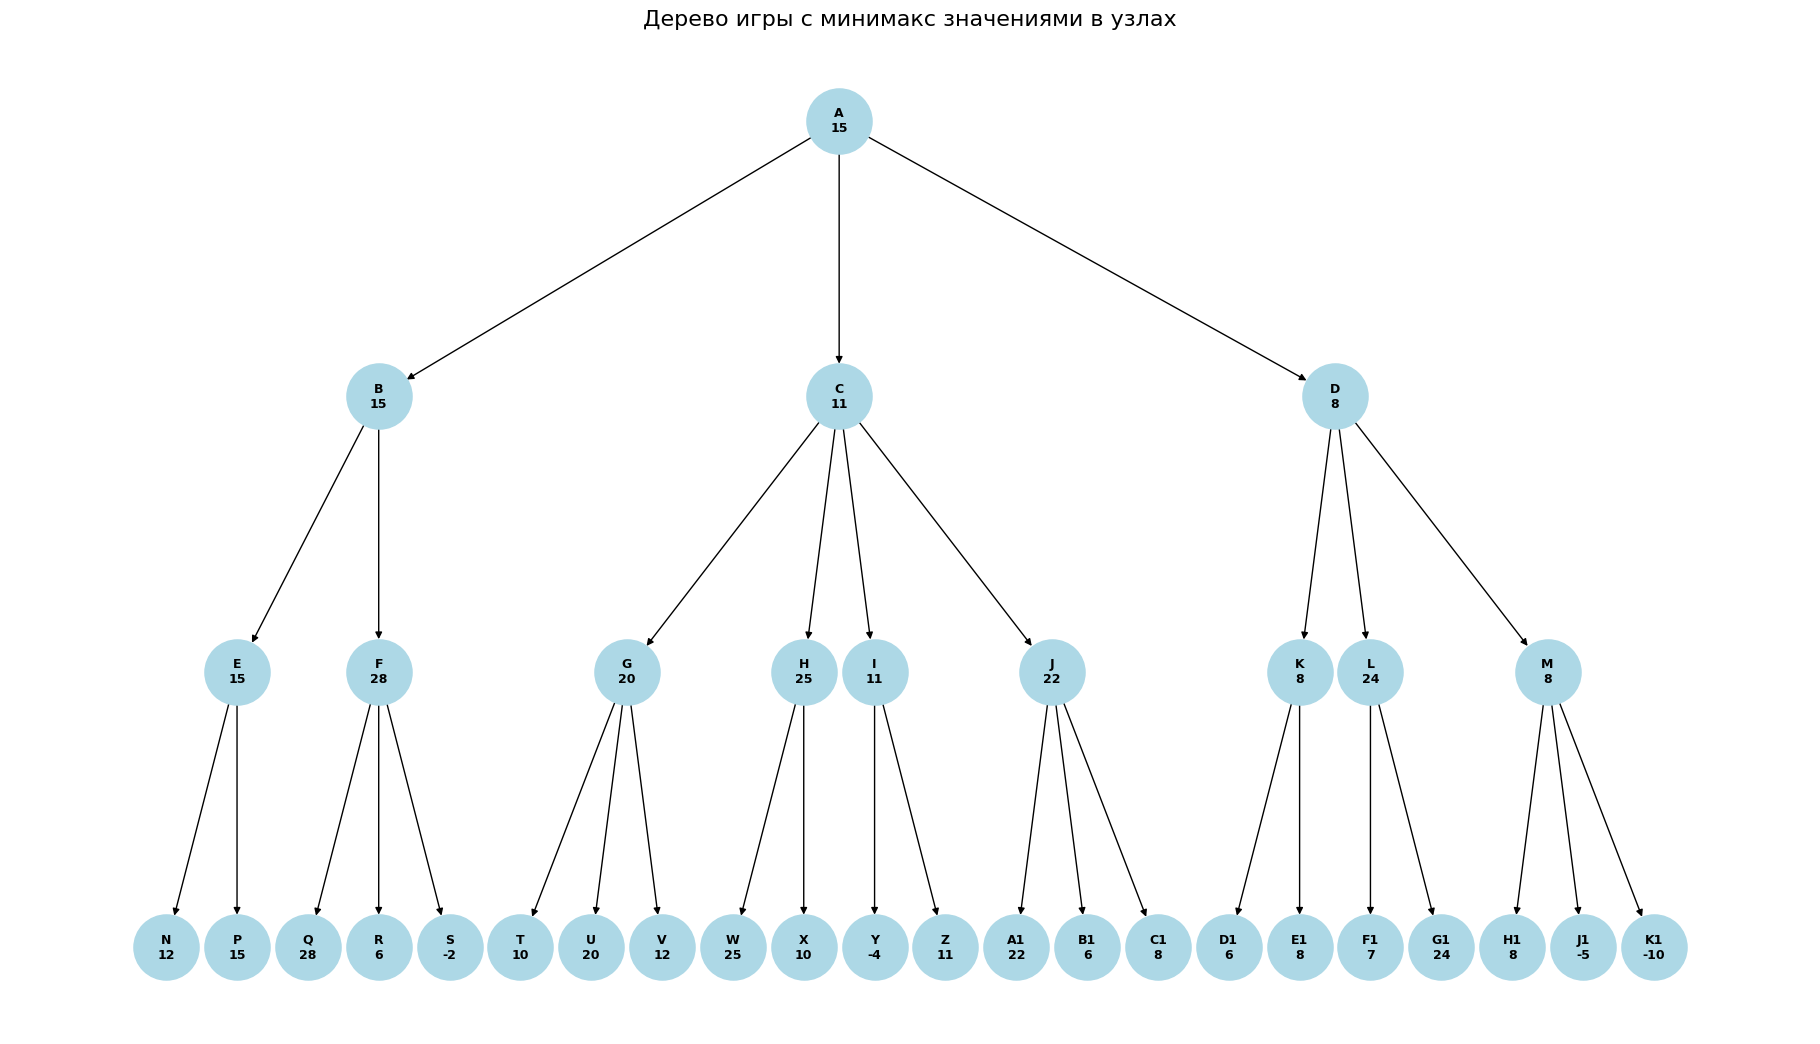

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Создание графа
G = nx.DiGraph()

# Добавим все узлы и значения
nodes = {
    'A': 15,
    'B': 15, 'C': 11, 'D': 8,
    'E': 15, 'F': 28, 'G': 20, 'H': 25, 'I': 11, 'J': 22,
    'K': 8, 'L': 24, 'M': 8,
    'N': 12, 'P': 15, 'Q': 28, 'R': 6, 'S': -2,
    'T': 10, 'U': 20, 'V': 12, 'W': 25, 'X': 10,
    'Y': -4, 'Z': 11, 'A1': 22, 'B1': 6, 'C1': 8,
    'D1': 6, 'E1': 8, 'F1': 7, 'G1': 24,
    'H1': 8, 'J1': -5, 'K1': -10
}

# Добавим узлы с метками
for node, val in nodes.items():
    G.add_node(node, label=f'{node}\n{val}')

# Добавим рёбра
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'E'), ('B', 'F'),
    ('E', 'N'), ('E', 'P'),
    ('F', 'Q'), ('F', 'R'), ('F', 'S'),
    ('C', 'G'), ('C', 'H'), ('C', 'I'), ('C', 'J'),
    ('G', 'T'), ('G', 'U'), ('G', 'V'),
    ('H', 'W'), ('H', 'X'),
    ('I', 'Y'), ('I', 'Z'),
    ('J', 'A1'), ('J', 'B1'), ('J', 'C1'),
    ('D', 'K'), ('D', 'L'), ('D', 'M'),
    ('K', 'D1'), ('K', 'E1'),
    ('L', 'F1'), ('L', 'G1'),
    ('M', 'H1'), ('M', 'J1'), ('M', 'K1')
]
G.add_edges_from(edges)

# Установим позиции через graphviz layout (hierarchical)
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Подписи
labels = nx.get_node_attributes(G, 'label')

# Отрисовка
plt.figure(figsize=(18, 10))
nx.draw(G, pos, labels=labels, with_labels=True, node_size=2200, node_color='lightblue', font_size=9, font_weight='bold')
plt.title("Дерево игры с минимакс значениями в узлах", fontsize=16)
plt.axis('off')
plt.show()


##Задание 1 Минимакс — определение значений всех узлов


`Поддерево B (MIN):`
- `E (MAX):` max(12, 15) = 15
- `F (MAX):` max(28, 6, -2) = 28
- `B` = min(15, 28) = 15

`Поддерево C (MIN):`
- `G (MAX):` max(10, 20, 12) = 20
- `H (MAX):` max(25, 10) = 25
- `I (MAX):` max(-4, 11) = 11
- `J (MAX):` max(22, 6, 8) = 22
- `C` = min(20, 25, 11, 22) = 11

`Поддерево D (MIN):`
- `K (MAX):` max(6, 8) = 8
- `L (MAX):` max(7, 24) = 24
- `M (MAX):` max(8, -5, -10) = 8
- `D` = min(8, 24, 8) = 8

`Корень A (MAX):`
- `A` = max(15, 11, 8) = 15

---

- Минимакс значение корня `A = 15`,

 - Лучший путь: `A → B → E → P (15)`


- `A` — это корень дерева, на котором ходит игрок MAX,

- Он выбирает наилучшее возможное значение среди:

  - `B = 15`

  - `C = 11`

  - `D = 8`


- Максимум из этих значений:

$$
A = \max(15,\ 11,\ 8) = \boxed{15}
$$



`Отслеживаем α и β`
`A (MAX):`
начальные значения:

- α = −∞
- β = ∞

`B (MIN):`
переходим к потомкам E и F

- `E (MAX):`
  - `N = 12`, α = 12
  - `P = 15`, α = max(12, 15) = 15

    → E = 15

    → B получает β = 15

- `F (MAX):`
идём по очереди:

  - `Q = 28`, α = 28

    → но уже видно, что `F = 28`, а у `B` надо брать минимум,

    → а у B уже есть кандидат `E = 15`,

    → и `28 > 15`, это хуже для `MIN`.


значит, можем прервать просмотр F

    `→ ОТСЕКАЕМ R и S`

---

`Первое отсечение:`

`Узлы R и S не просматриваются.`

---

`C (MIN):`

идём по потомкам `G`, `H`, `I`, `J`

(альфа у A = 15, см. результат из B)

- `G (MAX):`
  - T = 10 → α = 10
  - U = 20 → α = 20
  - V = 12 → α = 20

    → G = 20

  → C получает β = 20

(ещё не отсекли)

- `H (MAX):`

  - W = 25 → α = 25

  - Сравниваем:

    C пока считает G = 20, H = 25 → значит C ≥ 20

    → A уже имеет 15

    → β = 20, α = 15, пока не отсекли.

  - X = 10 → α = 25 → без отсечений

- `I (MAX):`
  - Y = -4 → α = -4
  - Z = 11 → α = 11 → I = 11

    → C получает: G = 20, H = 25, I = 11

- `J (MAX):`
  - A1 = 22 → α = 22

    → уже больше, чем A может принять


→ A = max(B=15, C=11, D=?)

→ А уже знает: значение C будет как минимум 11, но J = 22 — слишком большой для MIN

но отсечения тут не происходит, потому что C всё равно выбирает min(20, 25, 11, 22) = 11

---

`D (MIN):`

- `K (MAX):`

  - D1 = 6, E1 = 8 → K = 8

    → D получает β = 8


У A уже есть α = 15,

→ D = MIN, и любой потомок меньше 15

→ Если D ≥ 15, A мог бы обновиться, но тут D = 8 → нет отсечений.

- `L (MAX):`

  - `F1` = 7 → α = 7

  - `G1` = 24 → α = 24 → L = 24

    → D = min(K=8, L=24) = 8

    → D остаётся 8

- `M (MAX):`

  - H1 = 8 → α = 8

    → но смысла смотреть дальше уже нет, потому что

    → D = min(K=8, L=24, M=?)

    → как только у D есть что-то ≤ текущей оценки A,

    → можно завершать — но здесь это граничная ситуация

---

Ответ:

Отсечены ветви `R и S` в поддереве `F`.

Это происходит потому, что:

- `E = 15` уже дал значение `B = 15` для `MIN`,

- `Q = 28` в `F` — слишком хорош для `MAX, MIN` всё равно выберет `E = 15`,

- `→ R и S` нет смысла проверять.



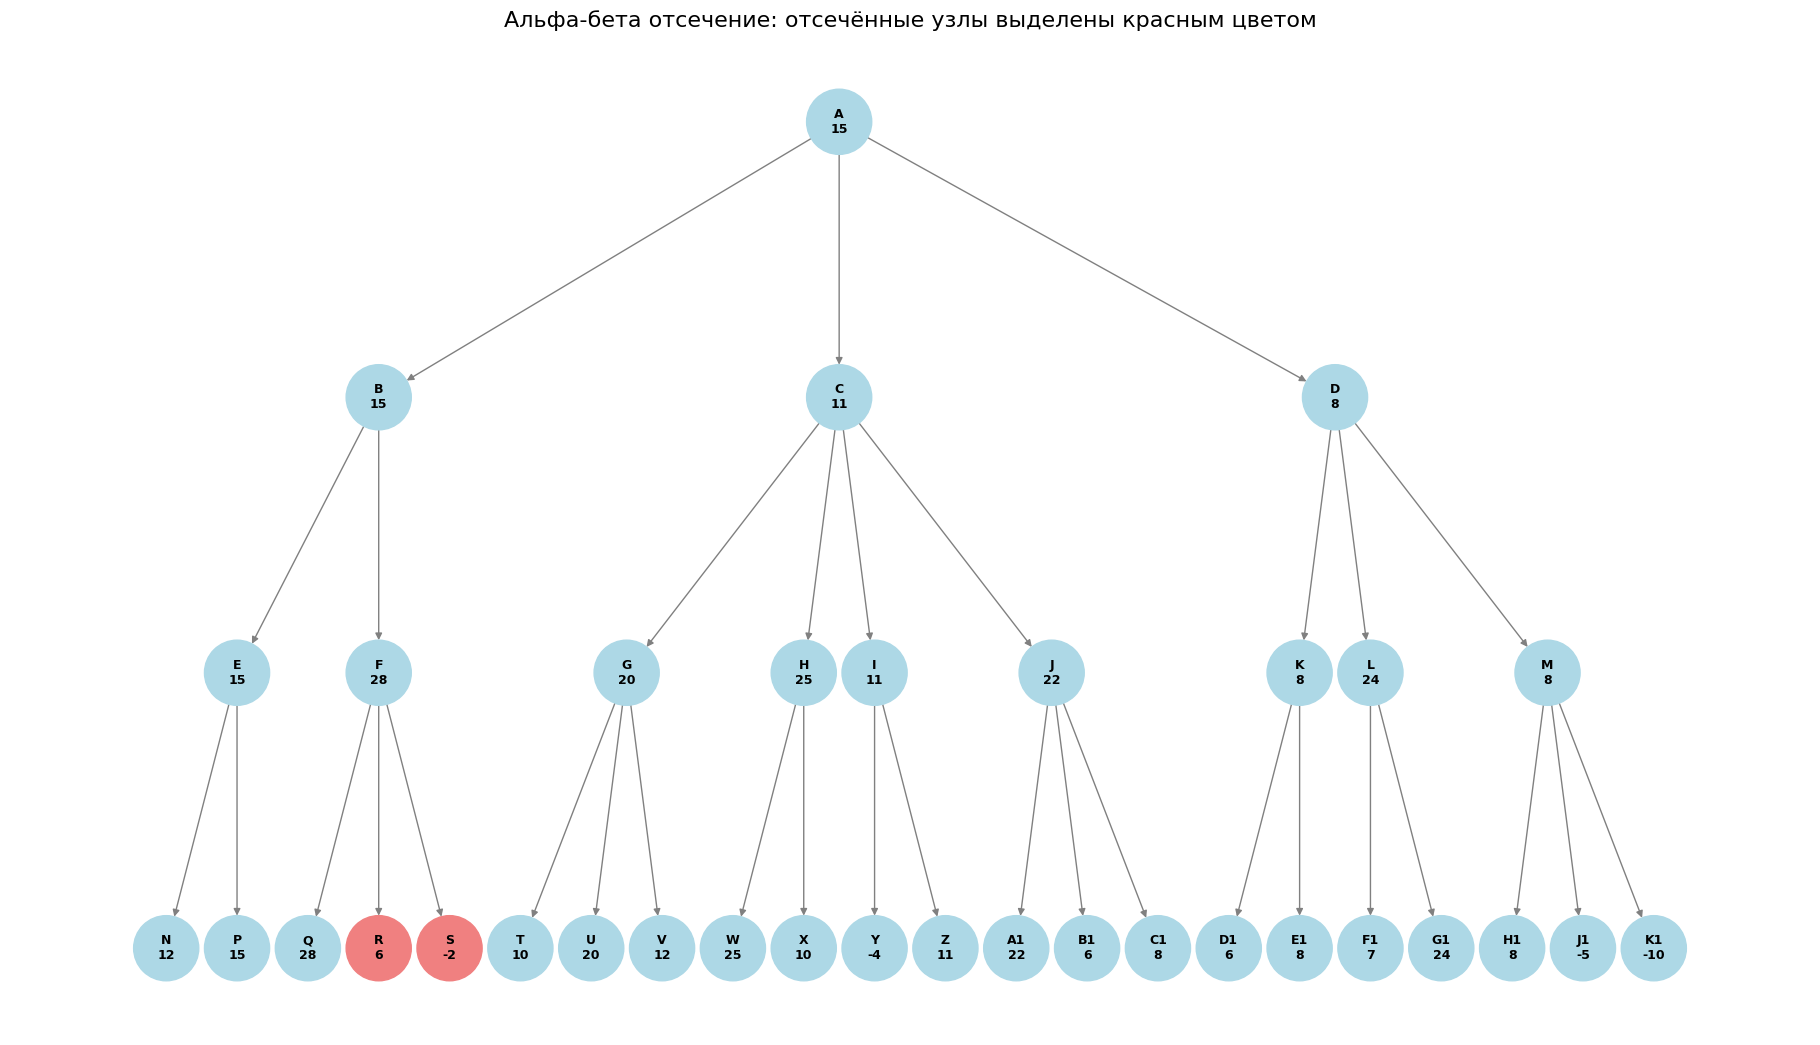

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Создание графа
G = nx.DiGraph()

# Значения узлов
nodes = {
    'A': 15,
    'B': 15, 'C': 11, 'D': 8,
    'E': 15, 'F': 28, 'G': 20, 'H': 25, 'I': 11, 'J': 22,
    'K': 8, 'L': 24, 'M': 8,
    'N': 12, 'P': 15, 'Q': 28, 'R': 6, 'S': -2,
    'T': 10, 'U': 20, 'V': 12, 'W': 25, 'X': 10,
    'Y': -4, 'Z': 11, 'A1': 22, 'B1': 6, 'C1': 8,
    'D1': 6, 'E1': 8, 'F1': 7, 'G1': 24,
    'H1': 8, 'J1': -5, 'K1': -10
}

# Отсечённые узлы
pruned_nodes = {'R', 'S'}

# Добавим узлы с подписями
for node, val in nodes.items():
    G.add_node(node, label=f'{node}\n{val}')

# Структура дерева
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'E'), ('B', 'F'),
    ('E', 'N'), ('E', 'P'),
    ('F', 'Q'), ('F', 'R'), ('F', 'S'),
    ('C', 'G'), ('C', 'H'), ('C', 'I'), ('C', 'J'),
    ('G', 'T'), ('G', 'U'), ('G', 'V'),
    ('H', 'W'), ('H', 'X'),
    ('I', 'Y'), ('I', 'Z'),
    ('J', 'A1'), ('J', 'B1'), ('J', 'C1'),
    ('D', 'K'), ('D', 'L'), ('D', 'M'),
    ('K', 'D1'), ('K', 'E1'),
    ('L', 'F1'), ('L', 'G1'),
    ('M', 'H1'), ('M', 'J1'), ('M', 'K1')
]
G.add_edges_from(edges)

# Позиции узлов
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Подписи
labels = nx.get_node_attributes(G, 'label')

# Цвета: красный для отсечённых, синий — остальных
node_colors = ['lightcoral' if node in pruned_nodes else 'lightblue' for node in G.nodes()]


# Отрисовка без обводок, только с красной заливкой для отсечённых узлов
plt.figure(figsize=(18, 10))
nx.draw(G, pos, labels=labels, with_labels=True,
        node_size=2200,
        node_color=node_colors,
        font_size=9,
        font_weight='bold',
        edge_color='gray')

plt.title("Альфа-бета отсечение: отсечённые узлы выделены красным цветом", fontsize=16)
plt.axis('off')
plt.show()


#Задание 2. Крестики-нолики

##`Нарисуйте остальную часть дерева игры, начиная с текущего состояния, где ходит X.`

S0: текущее состояние

  → X может пойти в: 3, 5, 8

---

`Уровень 1: ходы игрока X`

S1 (X в 3):

<pre>
 O | O | X
-----------
 X | X |  
-----------
 O | X |  
</pre>

`Свободны: 5, 8`

Следующий ход — O

---
S2 (X в 5):

<pre>
 O | O | X
-----------
   | X | X  
-----------
 O | X |  
</pre>

`Свободны: 3, 8`

Следующий ход — O

---

S3 (X в 8):

<pre>
 O | O | X
-----------
   | X |   
-----------
 O | X | X
</pre>

`Свободны: 3, 5`

Следующий ход — O

---

`Уровень 2: ходы игрока O`

`Только для одной ветки, чтобы не перегружать; в полном виде — это 3 х 2 = 6 состояний`

Пример: продолжение от S1 (X в 3) → O может пойти в 5 или 8:

---

S1-1 (O в 5):

<pre>
 O | O | X
-----------
   | X |   
-----------
 O | X | X
</pre>

`Свободно: 8`

Следующий ход — X

---
S1-2 (O в 8):

<pre>
 O | O | X
-----------
   | X |   
-----------
 O | X | X
</pre>

`Свободно: 5`

Следующий ход — X

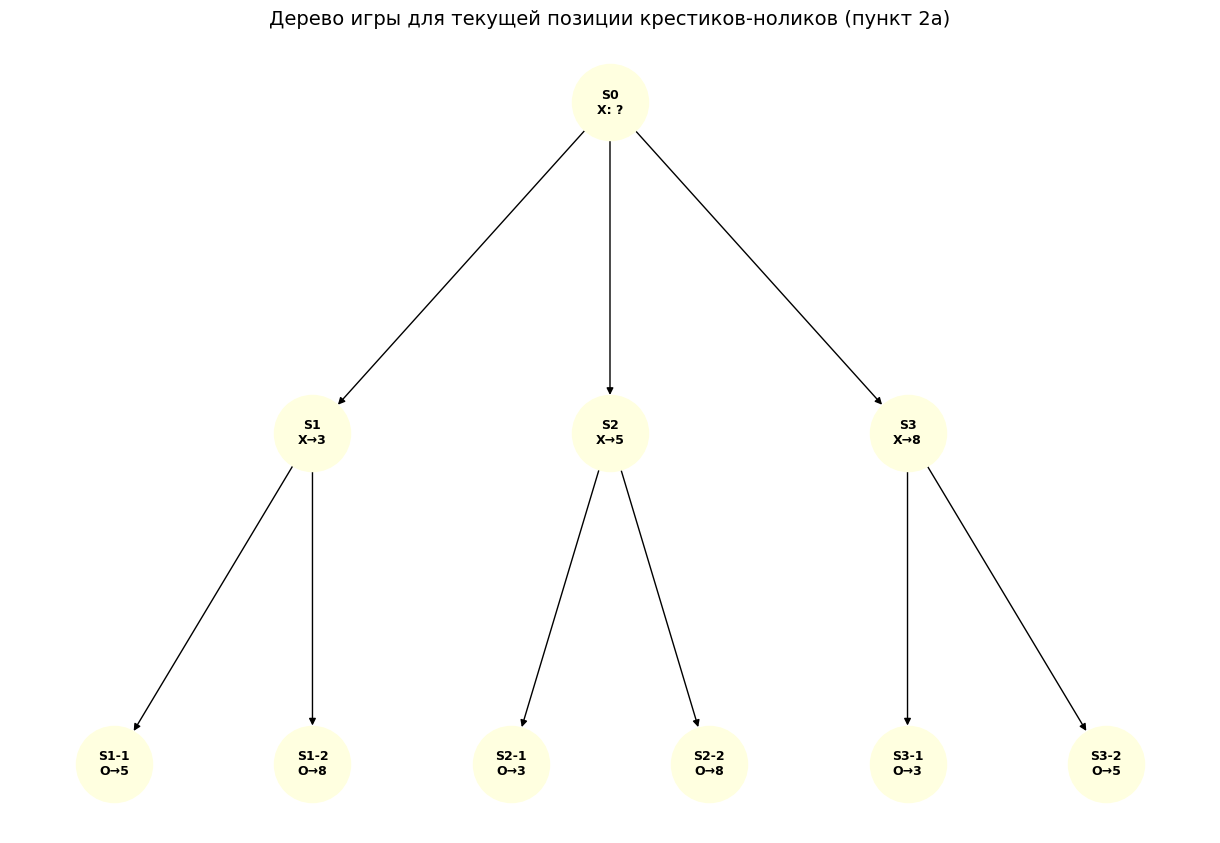

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Создаём граф
G = nx.DiGraph()

# Узлы и подписи — состояния доски кратко
# Корень: текущее состояние
G.add_node("S0", label="S0\nX: ?")

# Уровень 1 — ходы X
G.add_node("S1", label="S1\nX→3")
G.add_node("S2", label="S2\nX→5")
G.add_node("S3", label="S3\nX→8")
G.add_edges_from([("S0", "S1"), ("S0", "S2"), ("S0", "S3")])

# Уровень 2 — ходы O (в каждой ветке X)
G.add_node("S1-1", label="S1-1\nO→5")
G.add_node("S1-2", label="S1-2\nO→8")
G.add_edges_from([("S1", "S1-1"), ("S1", "S1-2")])

G.add_node("S2-1", label="S2-1\nO→3")
G.add_node("S2-2", label="S2-2\nO→8")
G.add_edges_from([("S2", "S2-1"), ("S2", "S2-2")])

G.add_node("S3-1", label="S3-1\nO→3")
G.add_node("S3-2", label="S3-2\nO→5")
G.add_edges_from([("S3", "S3-1"), ("S3", "S3-2")])

# Получим подписи
labels = nx.get_node_attributes(G, 'label')

# Позиционирование и отрисовка
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

plt.figure(figsize=(12, 8))
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='lightyellow', font_size=9, font_weight='bold')
plt.title("Дерево игры для текущей позиции крестиков-ноликов (пункт 2a)", fontsize=14)
plt.axis('off')
plt.show()


- S0 — текущее состояние (ход X),

- `S1 / S2 / S3` — возможные ходы X:

  - `S1` — X → в клетку 3,

  - `S2` — X → в клетку 5,

  - `S3` — X → в клетку 8.

- Далее игрок O отвечает своими возможными ходами (например, в `S1-1` он пошёл в 5).

##B

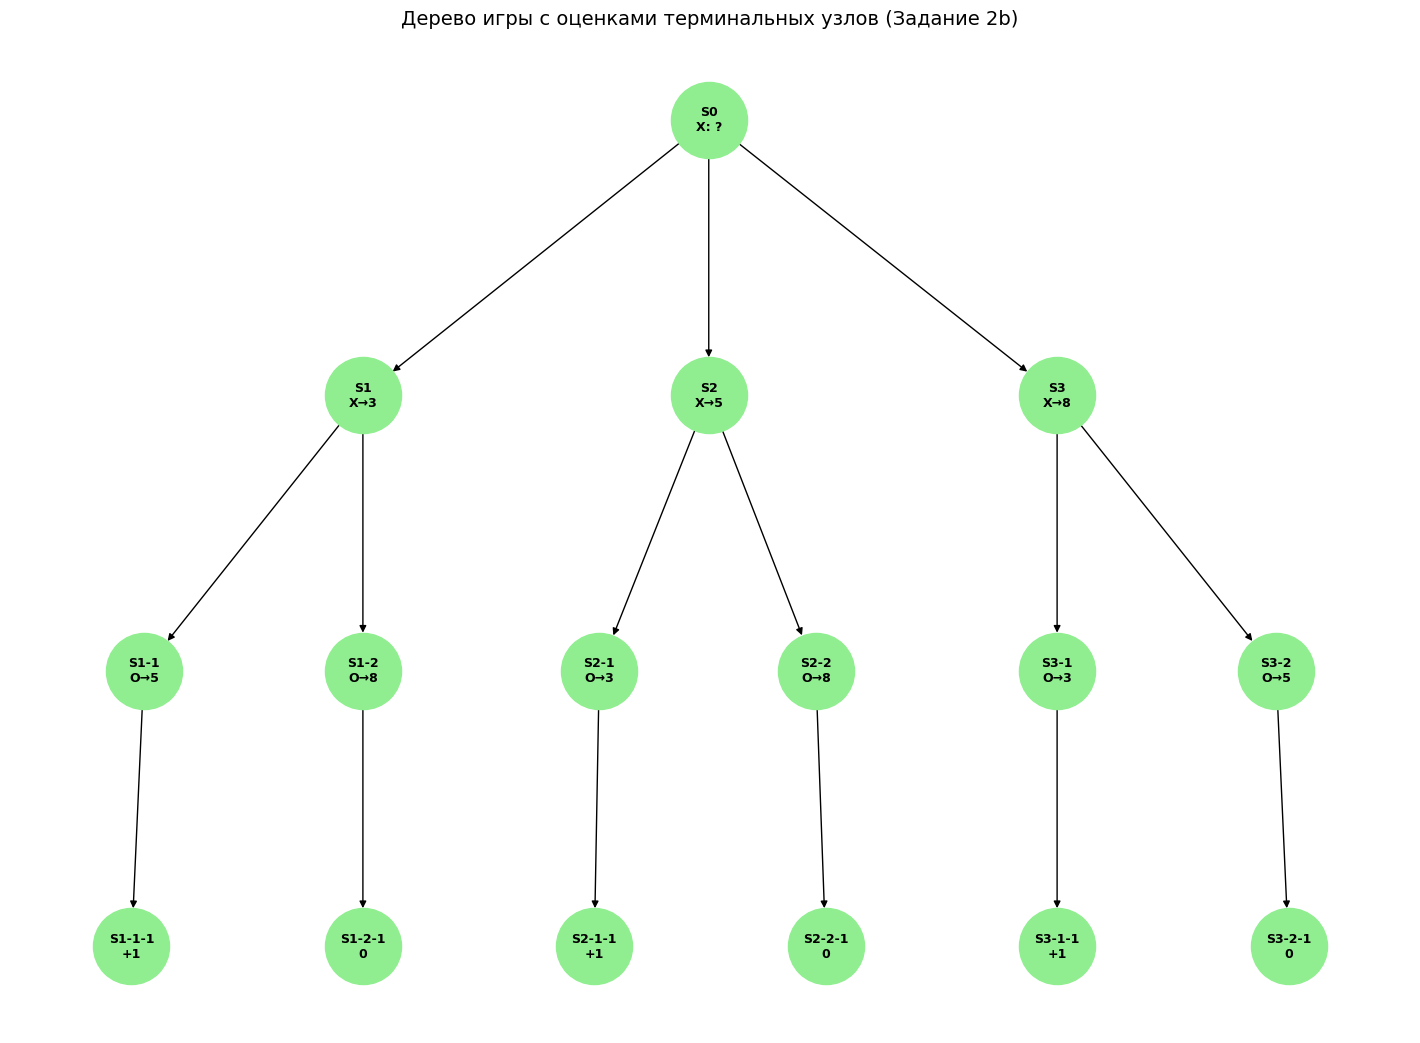

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Создаём граф
G = nx.DiGraph()

# Уровень 0
G.add_node("S0", label="S0\nX: ?")

# Уровень 1 — ходы X
G.add_node("S1", label="S1\nX→3")
G.add_node("S2", label="S2\nX→5")
G.add_node("S3", label="S3\nX→8")
G.add_edges_from([("S0", "S1"), ("S0", "S2"), ("S0", "S3")])

# Уровень 2 — ходы O
G.add_node("S1-1", label="S1-1\nO→5")
G.add_node("S1-2", label="S1-2\nO→8")
G.add_node("S2-1", label="S2-1\nO→3")
G.add_node("S2-2", label="S2-2\nO→8")
G.add_node("S3-1", label="S3-1\nO→3")
G.add_node("S3-2", label="S3-2\nO→5")
G.add_edges_from([
    ("S1", "S1-1"), ("S1", "S1-2"),
    ("S2", "S2-1"), ("S2", "S2-2"),
    ("S3", "S3-1"), ("S3", "S3-2")
])

# Уровень 3 — ходы X (терминальные узлы с оценкой)
terminal_states = {
    "S1-1-1": "+1",
    "S1-2-1": "0",
    "S2-1-1": "+1",
    "S2-2-1": "0",
    "S3-1-1": "+1",
    "S3-2-1": "0"
}

for node, val in terminal_states.items():
    G.add_node(node, label=f"{node}\n{val}")

G.add_edges_from([
    ("S1-1", "S1-1-1"),
    ("S1-2", "S1-2-1"),
    ("S2-1", "S2-1-1"),
    ("S2-2", "S2-2-1"),
    ("S3-1", "S3-1-1"),
    ("S3-2", "S3-2-1"),
])

# Получаем подписи
labels = nx.get_node_attributes(G, 'label')

# Позиционирование и отрисовка
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

plt.figure(figsize=(14, 10))
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='lightgreen', font_size=9, font_weight='bold')
plt.title("Дерево игры с оценками терминальных узлов (Задание 2b)", fontsize=14)
plt.axis('off')
plt.show()


Пояснение к узлам:
- В верхнем уровне (`S0`) ходит игрок X.

- В среднем уровне (`S1, S2, S3`) и подузлах (`S1-1, ...`) — ходит O.

- В нижнем уровне — финальные состояния, которым присвоены значения:

  - `+1 — победа X`,

  - `0 — ничья`.

##C

Сейчас на вершине дерева — ход X, значит, мы ищем максимальное значение среди возможных ходов (в минимакс-стиле):

Посмотрим на каждый из трёх вариантов хода X:

---

`Ход S1 (X → 3):`

- S1 → S1-1 → +1
- S1 → S1-2 → 0
- → наилучший исход: +1

---

`Ход S2 (X → 5):`
- S2 → S2-1 → +1
- 2 → S2-2 → 0
- → наилучший исход: +1

---

`Ход S3 (X → 8):`
- S3 → S3-1 → +1
- S3 → S3-2 → 0
- → наилучший исход: +1

---

Во всех трёх вариантах X может гарантировать себе как минимум +1 (победу),

но во всех случаях есть и риск ничьей (если O сыграет правильно).

---

Игрок X может выбрать любой из ходов:

В позицию 3, 5 или 8 — все дают возможность победы.

##D

| Ход X     | Ответ O | Финальный ход X | Итог |
|-----------|---------|-----------------|------|
| X → 3     | O → 5   | X → 8           | +1   |
|           | O → 8   | X → 5           |  0   |
| X → 5     | O → 3   | X → 8           | +1   |
|           | O → 8   | X → 3           |  0   |
| X → 8     | O → 3   | X → 5           | +1   |
|           | O → 5   | X → 3           |  0   |

---

В каждой ветке O выбирает наименьшую оценку:

- В S1: min(+1, 0) = 0
- В S2: min(+1, 0) = 0
- В S3: min(+1, 0) = 0

➡️ Для X это означает: если O будет играть идеально, то X не сможет победить, максимум — ничья.

---

Если оба игрока играют оптимально, игра закончится в ничью.

`Итоговое значение: 0`

##E

- В этом конкретном дереве все оценки терминальных узлов `= +1 или 0`

- И игрок O всегда должен посмотреть обе ветви, чтобы выбрать минимум.

- Условия для альфа-бета отсечения не выполняются, потому что:

  - оценка `α (от MAX)` не ограничивает выбор O,

  - и наоборот — `β (у O)` не приводит к отбрасыванию ходов MAX.

---

`Ответ:`

`Нет`, в данном дереве альфа-бета отсечение не сможет обрезать ни одну из ветвей.
Все ветви нужно рассматривать полностью, потому что значения терминалов `(0 и +1) слишком близки`,
и не происходит ситуации, при которой `β ≤ α` на каком-либо уровне дерева.

#Задание 3

Из таблицы (задание на втором изображении), у нас 14 записей по Credit Risk.

Давайте посчитаем количество примеров каждого класса:

- Credit Risk = high:

  Записи: 1, 2, 3, 4, 5, 7, 8, 14 → 8 записей

- Credit Risk = low:

  Записи: 6, 9, 10, 11, 12, 13 → 6 записей

---

Вычислим энтропию:

$$
\begin{aligned}
H(S) &= -\left( \frac{8}{14} \cdot \log_2 \left( \frac{8}{14} \right) + \frac{6}{14} \cdot \log_2 \left( \frac{6}{14} \right) \right) \\\\
&= -\left( 0.571 \cdot \log_2(0.571) + 0.429 \cdot \log_2(0.429) \right) \\\\
&\approx -\left( 0.571 \cdot (-0.807) + 0.429 \cdot (-1.222) \right) \\\\
&\approx -(-0.461 - 0.524) = 0.985
\end{aligned}
$$

---

Энтропия исходного набора `S ≈ 0.985 бит`

Это означает, что в выборке классы достаточно перемешаны, и деление по подходящему признаку поможет уменьшить неопределённость (энтропию).

##Рассчитаем информационный прирост (information gain) для каждого признака

`Credit History`

Возможные значения:
- good
- bad
- unknown

1. Credit History = good

`Credit Risk = low` — 5 шт → H = 0 (все одного класса) |

2. Credit History = bad
high — 4 → 𝐻 = 0

3. Credit History = unknown

high — 3, low — 2

---

$$
p_{\text{high}} = \frac{3}{5}, \quad p_{\text{low}} = \frac{2}{5}
$$

$$
H = -\left( \frac{3}{5} \log_2 \frac{3}{5} + \frac{2}{5} \log_2 \frac{2}{5} \right)
\approx -(0.6 \cdot -0.737 + 0.4 \cdot -1.322) \approx 0.971
$$

---

**Подставим в формулу:**

$$
IG(S, \text{Credit History}) = 0.985 -
\left(
\frac{5}{14} \cdot 0 +
\frac{4}{14} \cdot 0 +
\frac{5}{14} \cdot 0.971
\right)
$$

$$
= 0.985 - (0 + 0 + 0.347) = 0.638
$$


Информационный прирост Credit History: ≈ 0.638

---

Признак `Debt`: {low, high}


1. `Debt = low`

| Записи | 3, 4, 5, 6, 7, 8, 9 |  
| Размер | 7 |  
| Классы: | `high` — 3 (3, 4, 5), `low` — 4 (6, 7, 8, 9) |

$$
p_{\text{high}} = \frac{3}{7}, \quad p_{\text{low}} = \frac{4}{7}
$$

$$
H \approx -\left( 0.429 \cdot (-1.222) + 0.571 \cdot (-0.807) \right) \approx 0.985
$$

---

2. `Debt = high`

| Записи | 1, 2, 10, 11, 12, 13, 14 |  
| Размер | 7 |  
| Классы: | `high` — 5 (1, 2, 11, 13, 14), `low` — 2 (10, 12) |

$$
p_{\text{high}} = \frac{5}{7}, \quad p_{\text{low}} = \frac{2}{7}
$$

$$
H \approx -\left( 0.714 \cdot (-0.485) + 0.286 \cdot (-1.807) \right) \approx 0.863
$$

---

**Подставим в формулу:**

$$
IG(S, \text{Debt}) = 0.985 - \left( \frac{7}{14} \cdot 0.985 + \frac{7}{14} \cdot 0.863 \right)
= 0.985 - (0.4925 + 0.4315) = 0.061
$$

---

**Информационный прирост `Debt`:** `≈ 0.061`



Признак `Collateral`: {none, adequate}

---

1. `Collateral = none`

| Записи | 1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 14 |  
| Размер | 11 |  
| Классы: `high` — 8 (1, 5, 7, 11, 14), `low` — 3 (6, 9, 13) |

$$
p_{\text{high}} = \frac{8}{11}, \quad p_{\text{low}} = \frac{3}{11}
$$

$$
H \approx -\left( 0.727 \cdot (-0.47) + 0.273 \cdot (-1.871) \right) \approx 0.845
$$

---

2. `Collateral = adequate`

| Записи | 8, 10, 12 |  
| Размер | 3 |  
| Классы: `high` — 1 (8), `low` — 2 (10, 12) |

$$
p_{\text{high}} = \frac{1}{3}, \quad p_{\text{low}} = \frac{2}{3}
$$

$$
H \approx -\left( 0.333 \cdot (-1.585) + 0.667 \cdot (-0.585) \right) \approx 0.918
$$

---

**Подставим в формулу:**

$$
IG(S, \text{Collateral}) = 0.985 - \left( \frac{11}{14} \cdot 0.845 + \frac{3}{14} \cdot 0.918 \right)
= 0.985 - (0.664 + 0.197) = 0.124
$$

---

**Информационный прирост `Collateral`:**  `≈ 0.124`


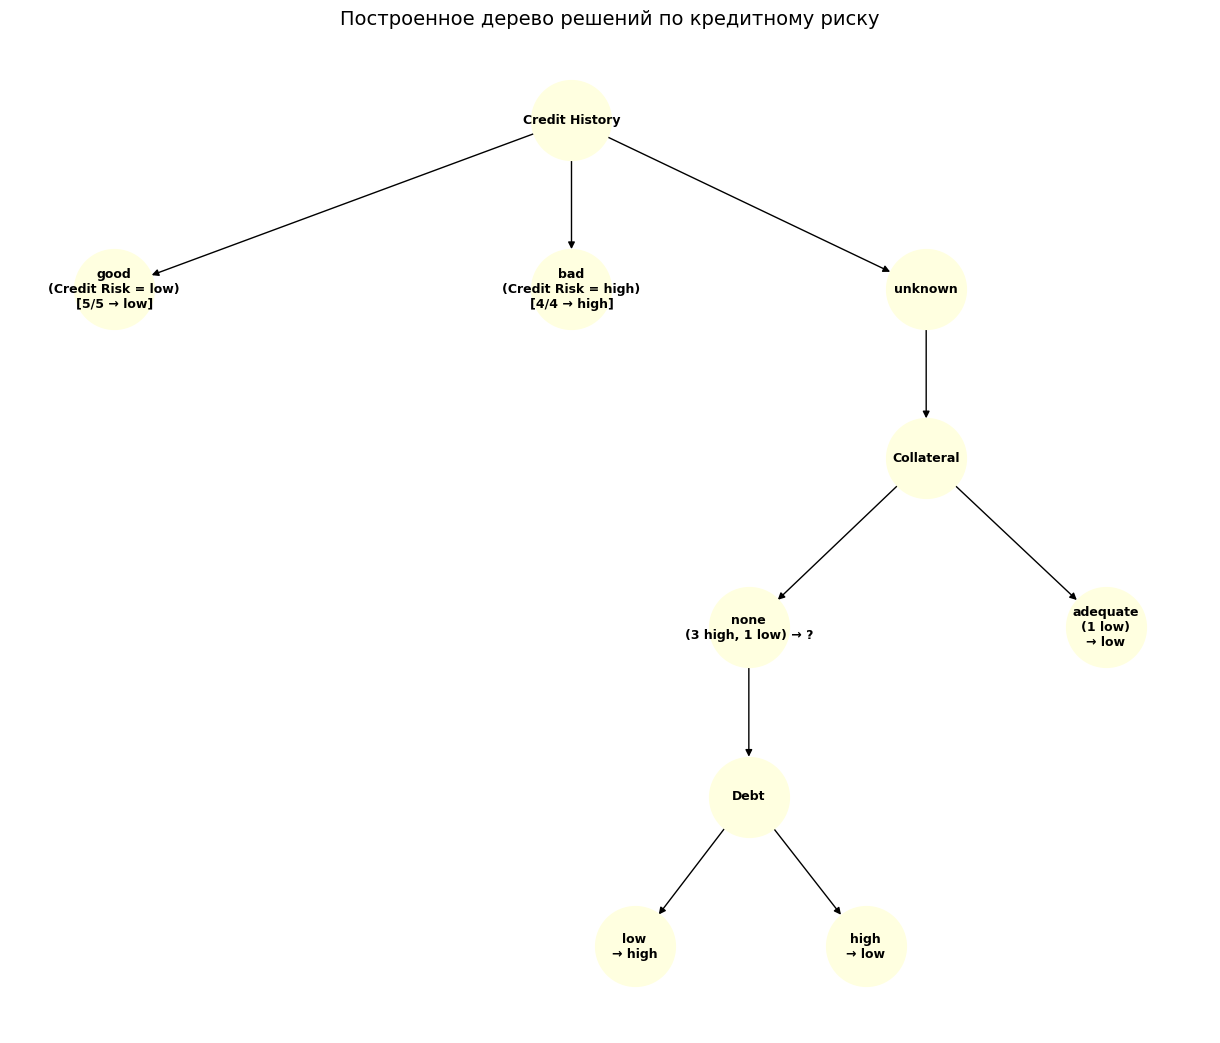

In [11]:
# Повторная отрисовка после сброса окружения

import matplotlib.pyplot as plt
import networkx as nx

# Создаём граф
G = nx.DiGraph()

# Корень дерева
G.add_node("root", label="Credit History")

# Первый уровень — значения признака Credit History
G.add_node("good", label="good\n(Credit Risk = low)\n[5/5 → low]")
G.add_node("bad", label="bad\n(Credit Risk = high)\n[4/4 → high]")
G.add_node("unknown", label="unknown")

G.add_edges_from([
    ("root", "good"),
    ("root", "bad"),
    ("root", "unknown")
])

# Подразделение "unknown" — разбиваем по Collateral
G.add_node("unknown_collateral", label="Collateral")
G.add_edges_from([
    ("unknown", "unknown_collateral")
])

# Ветки collateral = none / adequate
G.add_node("none", label="none\n(3 high, 1 low) → ?")
G.add_node("adequate", label="adequate\n(1 low)\n→ low")
G.add_edges_from([
    ("unknown_collateral", "none"),
    ("unknown_collateral", "adequate")
])

# Уточнение ветки none: делим по Debt
G.add_node("none_debt", label="Debt")
G.add_edges_from([("none", "none_debt")])

G.add_node("none_low", label="low\n→ high")
G.add_node("none_high", label="high\n→ low")
G.add_edges_from([
    ("none_debt", "none_low"),
    ("none_debt", "none_high")
])

# Подписи
labels = nx.get_node_attributes(G, 'label')
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Визуализация
plt.figure(figsize=(12, 10))
nx.draw(G, pos, labels=labels, with_labels=True,
        node_size=3300, node_color="lightyellow",
        font_size=9, font_weight='bold')
plt.title("Построенное дерево решений по кредитному риску", fontsize=14)
plt.axis('off')
plt.show()


Корень: `Credit History — признак с наибольшим информационным приростом`

- good → все примеры = low risk → терминальный узел
- bad → все примеры = high risk → терминальный узел
- unknown → содержит смешанные значения → требует уточнения

`Разбиение unknown по Collateral:`

- adequate → 1 пример → low → терминальный узел
- none → остаются 4 записи (3 high, 1 low) → ещё есть неопределённость


`Разбиение none по Debt:`

- low → все случаи = high
- high → единственный случай = low


##Задание 4

| No | Credit History | Debt | Collateral | Классификация (Credit Risk) |
|----|----------------|------|------------|------------------------------|
| 15 | good           | high | adequate   | low                          |
| 16 | unknown        | low  | adequate   | low                          |


Мы построили дерево решений, которое помогает по трём признакам —

`Credit History, Debt и Collateral` — определить,

будет ли у человека высокий или низкий кредитный риск.

---

1. Пример 1 — `Запись №15`:

- `Credit History = good`

- В дереве это ветка, где все клиенты имели низкий риск
  Поэтому ответ: `low`

2. Пример 2 — `Запись №16`:

- `Credit History = unknown`

-  Переходим в дерево → смотри `Collateral = adequate`

- Там в данных была только одна похожая запись, и у неё был низкий риск
  Поэтому тоже ответ: `low`

---

Мы просто следовали путям в дереве решений,

и в обоих случаях пришли к выводу: "`риск низкий (low)`".